In [1]:

from src import Landscaper
from src import InfoReader
from src import Scatter
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np


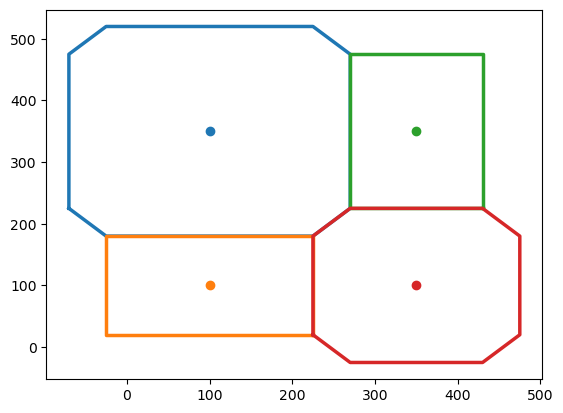

In [12]:
import pyvoro
points = [[100,350],[100,100],[350,350],[350,100]]
cells = pyvoro.compute_2d_voronoi(
    points, # point positions
    [[0.0, 500], [0.0, 500]], # limits
    1, # block size
    radii=[150,1.0,1.0,1.0], # particle radii -- optional, and keyword-compatible arg.
    periodic=[True, True]
)
plt.figure()
for c in cells:
    plt.scatter(*c['original'])
    vertices = np.array(c['vertices'])
    vertices = np.vstack([vertices, vertices[0]])
    plt.plot(vertices[:,0], vertices[:,1], lw=2.5)

In [46]:
import webcolors as wbc
wbc.name_to_rgb('red')

IntegerRGB(red=255, green=0, blue=0)

In [18]:
def posInList(Propagator, cPos):
    for p in Propagator:
        if all(p[:2] == cPos) or all(list(reversed(p[:2])) == cPos):
            return True
    return False

def nextNum(topo_mat, cNum, Propagator:list=[]):
    next = []
    for tp in topo_mat:
        if tp[0] == cNum:
            if not posInList(Propagator, tp[:2]):
                Propagator.append(tp)
                next.append(tp[1])
        elif tp[1] == cNum:
            if not posInList(Propagator, tp[:2]):
                tp[:2] = tp[:2][::-1]
                tp[3] = 1 - tp[3]
                Propagator.append(tp)
                next.append(tp[1])

    for n in next:
        Propagator = nextNum(topo_mat, n, Propagator)
    return Propagator

array([[0, 1, 5, 0, 0, 0.03, 'B'],
       [1, 2, 1, 0, 1, 0.12, 'A'],
       [2, 3, 1, 0, 2, 0.05, 'B']], dtype=object)

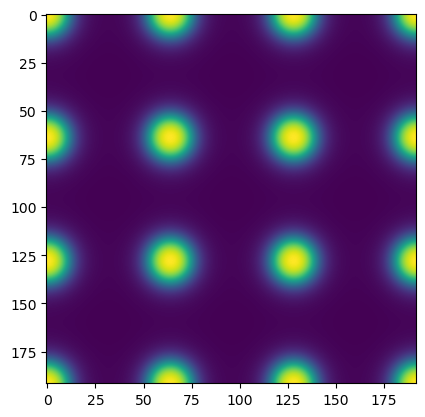

In [3]:
from scipy.ndimage import affine_transform
ir = InfoReader('../datasets/scatter/')
ir.collect()
ir.show(ir.block3)

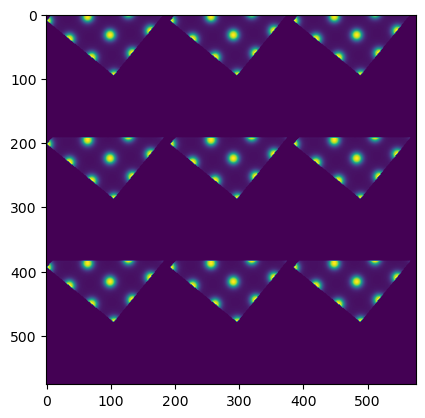

In [6]:
ir.show(np.tile(affine_transform(ir.block3, [[0.9, 1.1],[-1.1, 0.9]], offset=(-10,10)), (3,3)))

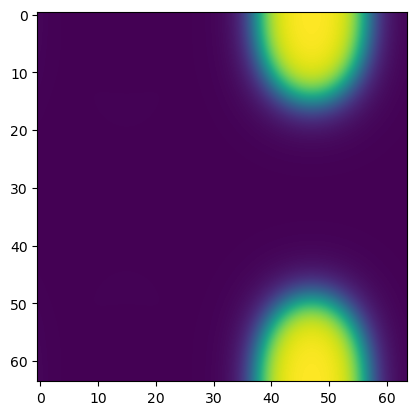

In [5]:
ir = InfoReader('./datasets/Info/')
ir.read_block()
ir.show(ir.block3)

In [6]:

config = {
    "font.family": 'Times New Roman',
    "font.size": 30,
    "mathtext.fontset": 'stix',
    "font.serif": ['SimSun'],
    'axes.unicode_minus': False,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.major.width': 4,
    'xtick.minor.width': 4,
    'xtick.major.size': 12,
    'xtick.minor.size': 6,
    'ytick.major.width': 4,
    'ytick.minor.width': 4,
    'ytick.major.size': 12,
    'ytick.minor.size': 6,
    'axes.linewidth': 2,
    'legend.frameon': False,
    'legend.fontsize': 'small',
}
mpl.rcParams.update(config)


极小值点: ly: 2.051041, lz:2.051041, freeE: 11.68579359
free energy mat shape: (121, 121)
level:  0.001 面积： 0.06137515901403393 周长： 1.330240638309082 IQ:  0.435855039600947
level:  0.01 面积： 0.41225182669873345 周长： 2.8725683813453373 IQ:  0.6278150190956073


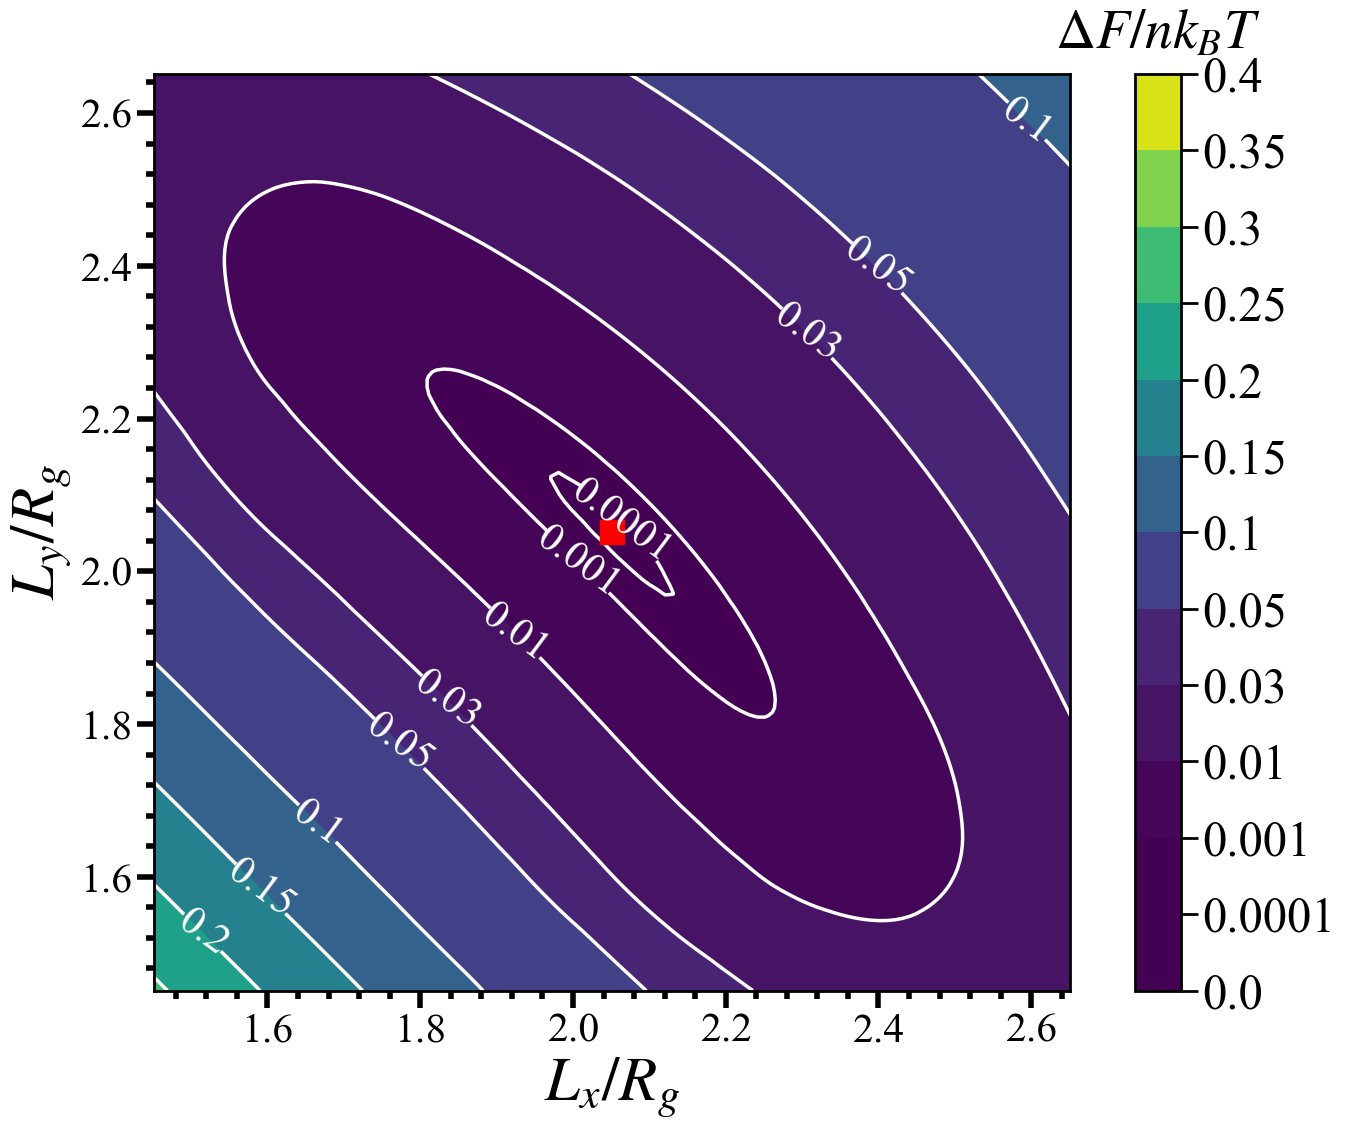

In [7]:
land = Landscaper(path='./datasets/Land/interp.csv')
land.read()
land.prospect(
    levels=[0, 0.0001, 0.001, 0.01, 0.03, 0.05,
            0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
    precision=-4,
    asp='square',
    xminor=5,
    yminor=5,
    clbacc=4,
    figsize=(16, 12),
    point_list=[
        [2.05104063, 2.05104063, 's', 'r', 300]
    ],
    manual=[
        (1.5, 1.5),
        (1.6,1.6),
        (1.66,1.66),
        (1.77,1.77),
        (1.84,1.84),
        (1.93,1.93),
        (2, 2),
        (2.06,2.06),
        (2.3,2.3),
        (2.4,2.4),
        (2.6,2.6),
    ]
    )


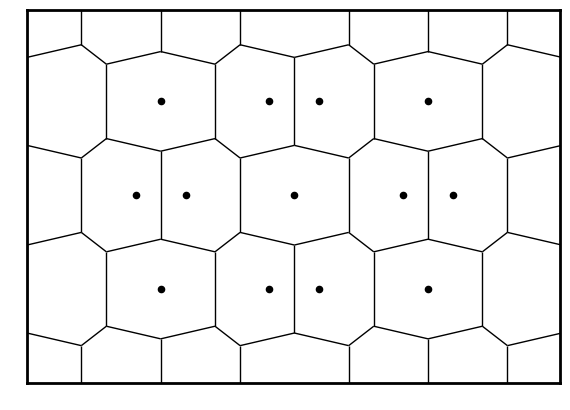

In [8]:
from src import VoronoiCell
import matplotlib.pyplot as plt

vc = VoronoiCell('./datasets/Vori/')
vc.collect()
vc.Voronoi(vc.phi0[1, :, :])

In [4]:
from collections import Counter
d = Counter(list('AAAABBBB'))

In [5]:
d['A']

4

In [11]:
"A" == "A" == "b"

False

In [9]:
Counter({'AAAA':3, 'A':5, 'a':5})

Counter({'AAAA': 3, 'A': 5, 'a': 5})